# Прямые и сверточные нейронные сети для обработки аудио сигналов

# Колеганов Николай Дмитриевич


Для базы GTZAN Жанровая коллекция

1.Сделать классификацию с помощью полносвязной нейронной сети. Оптимизатор архитектуры, размер мини-выборки, количество эпох и т. Д.).

2.Используя библиотеку librosa ( http://librosa.github.io/librosa/feature.html ), поверите набор признаков, извлекаемых из аудио-файла. Например, некоторые параметры могут быть вычислены не более чем за 10 секунд. Также можно обратить внимание на количество mfcc коэффициентов.

3.(Опционально) Применить линейные модели (решающие деревья, градиентный бустинг) из библиотеки sklearn на полученном датасете, сделать ансамбль моделей из нейросети и линейных моделей.


In [0]:
# функция извлечения и предварительной обработки данных
import librosa
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#matplotlib inline
import os
import PIL
from IPython.display import display
from PIL import Image
import pathlib
import csv

In [0]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing import image

In [0]:
#Keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.optimizers import Adam, Adadelta
from keras import optimizers
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks."""
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
import io
z = zipfile.ZipFile('/content/drive/My Drive/genres.zip', 'r')
z.extractall()

In [0]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
p = '_pic'
for t in genres:
    path = f'genres/{t+p}'
    if not os.path.isdir(path):
        os.makedirs(path)

In [0]:
!ls genres/

blues	   classical_pic  disco      hiphop	 jazz_pic   pop      reggae_pic
blues_pic  country	  disco_pic  hiphop_pic  metal	    pop_pic  rock
classical  country_pic	  genres     jazz	 metal_pic  reggae   rock_pic


In [0]:
!ls genres/genres/blues/  

blues.00000.au	blues.00020.au	blues.00040.au	blues.00060.au	blues.00080.au
blues.00001.au	blues.00021.au	blues.00041.au	blues.00061.au	blues.00081.au
blues.00002.au	blues.00022.au	blues.00042.au	blues.00062.au	blues.00082.au
blues.00003.au	blues.00023.au	blues.00043.au	blues.00063.au	blues.00083.au
blues.00004.au	blues.00024.au	blues.00044.au	blues.00064.au	blues.00084.au
blues.00005.au	blues.00025.au	blues.00045.au	blues.00065.au	blues.00085.au
blues.00006.au	blues.00026.au	blues.00046.au	blues.00066.au	blues.00086.au
blues.00007.au	blues.00027.au	blues.00047.au	blues.00067.au	blues.00087.au
blues.00008.au	blues.00028.au	blues.00048.au	blues.00068.au	blues.00088.au
blues.00009.au	blues.00029.au	blues.00049.au	blues.00069.au	blues.00089.au
blues.00010.au	blues.00030.au	blues.00050.au	blues.00070.au	blues.00090.au
blues.00011.au	blues.00031.au	blues.00051.au	blues.00071.au	blues.00091.au
blues.00012.au	blues.00032.au	blues.00052.au	blues.00072.au	blues.00092.au
blues.00013.au	blues.0003

# Получение спектрограмм

In [0]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'genres/genres/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./genres/genres/{g}'):
        songname = f'./genres/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'genres/{g+p}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [0]:
!ls genres/metal_pic

metal00000.png	metal00020.png	metal00040.png	metal00060.png	metal00080.png
metal00001.png	metal00021.png	metal00041.png	metal00061.png	metal00081.png
metal00002.png	metal00022.png	metal00042.png	metal00062.png	metal00082.png
metal00003.png	metal00023.png	metal00043.png	metal00063.png	metal00083.png
metal00004.png	metal00024.png	metal00044.png	metal00064.png	metal00084.png
metal00005.png	metal00025.png	metal00045.png	metal00065.png	metal00085.png
metal00006.png	metal00026.png	metal00046.png	metal00066.png	metal00086.png
metal00007.png	metal00027.png	metal00047.png	metal00067.png	metal00087.png
metal00008.png	metal00028.png	metal00048.png	metal00068.png	metal00088.png
metal00009.png	metal00029.png	metal00049.png	metal00069.png	metal00089.png
metal00010.png	metal00030.png	metal00050.png	metal00070.png	metal00090.png
metal00011.png	metal00031.png	metal00051.png	metal00071.png	metal00091.png
metal00012.png	metal00032.png	metal00052.png	metal00072.png	metal00092.png
metal00013.png	metal00033

(720, 720, 3)


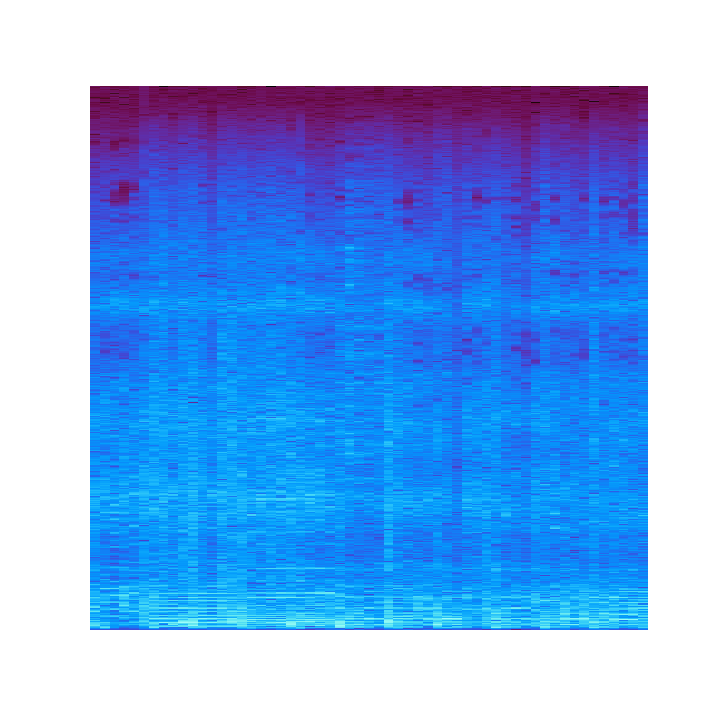

In [0]:
arr = image.load_img('genres/metal_pic/metal00022.png')
arr = image.img_to_array(arr)
print(arr.shape)
cv2_imshow(arr)

(720, 720, 3)


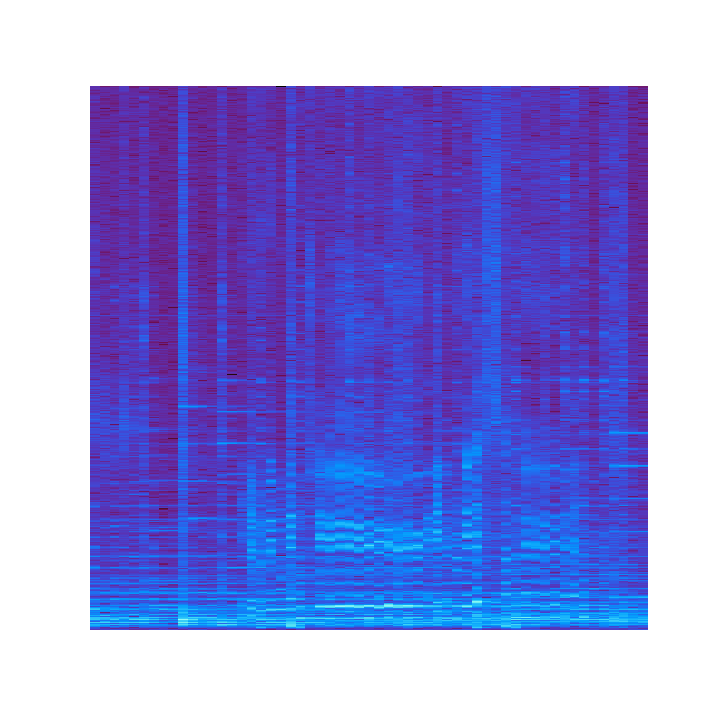

In [0]:
arr = image.load_img('genres/country_pic/country00022.png')
arr = image.img_to_array(arr)
print(arr.shape)
cv2_imshow(arr)

In [0]:
header = 'filename chroma_stft cent rms chroma_cens melspectrogram mfcc rmse spec_cent spec_bw rolloff zcr flatness'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('data_aud.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [0]:
file = open('data_aud.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [0]:
def get_features(y, sr):
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
  chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
  melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
  rmse = librosa.feature.rmse(y=y)
  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  zcr = librosa.feature.zero_crossing_rate(y)
  flatness = librosa.feature.spectral_flatness(y=y)
  mfcc = librosa.feature.mfcc(y=y, sr=sr)
  rms = librosa.feature.rms(y=y)
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(cent)} {np.mean(rms)} {np.mean(chroma_cens)} {np.mean(melspectrogram)} {np.mean(mfcc)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(flatness)}'    
  for e in mfcc:
    to_append += f' {np.mean(e)}'
  return to_append

In [0]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/genres/{g}'):
        songname = f'./genres/genres/{g}/{filename}'
        
        
        y, sr = librosa.load(songname, mono=True, duration=30)
        
        features = get_features(y, sr)
        features += f' {g}'
        file = open('data_aud.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(features.split())

In [0]:
from google.colab import files
files.download("data_aud.csv")

In [0]:
data = pd.read_csv('data_aud.csv')
print(data.head())
print(len(data))

         filename  chroma_stft         cent  ...    mfcc19     mfcc20  label
0  blues.00034.au     0.262248  1536.783076  ... -9.828355 -13.941392  blues
1  blues.00066.au     0.374710  2340.432873  ... -7.682608  -4.852479  blues
2  blues.00024.au     0.263129  1120.387619  ... -1.068164  -1.596130  blues
3  blues.00017.au     0.302096  1088.698166  ... -0.055459  -3.975350  blues
4  blues.00001.au     0.340983  1529.835316  ... -0.287431   0.531573  blues

[5 rows x 34 columns]
1000


In [0]:
print(data.shape)
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

(1000, 34)


In [0]:
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [0]:
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
print(y_train.shape)

(900,)


In [0]:
X_train[10]

array([-1.73827251, -1.18488297,  0.1091908 , -0.61737019, -0.1142808 ,
       -0.43944292,  0.1091908 , -1.18488297, -1.28512709, -1.10633546,
       -1.16449423, -0.68506201, -0.32726855,  1.43019071, -0.38540635,
        1.16530903, -1.64534175, -1.2057381 ,  0.35682419, -1.96231717,
        0.21912119, -1.038075  , -0.39833958, -0.08891032, -0.5119563 ,
       -0.95684195,  0.23069538, -0.82105033,  0.38199422, -0.63542997,
        0.6148551 ,  0.48581948])

In [0]:
X_train.shape

(900, 32)

# Обучение с помощью классического машинного обучения

In [0]:
#метод опорных векторов
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
labelsPredict = clf.predict(X_test)
print(labelsPredict)

result = clf.score(X_test, y_test)
print(result)

[7 5 3 8 1 8 1 2 3 5 5 0 1 5 8 3 1 5 0 3 4 2 1 4 3 3 2 6 7 7 4 7 6 7 3 2 4
 9 3 4 8 1 4 8 1 0 2 6 6 5 2 9 8 1 6 5 1 2 3 3 0 9 5 0 7 2 2 1 7 8 1 7 6 3
 6 2 0 4 0 0 4 4 6 5 7 0 5 4 3 7 0 9 8 7 5 5 9 1 0 0]
0.66


In [0]:
from sklearn import svm
clf_rbf = svm.SVC(kernel = 'rbf')
clf_rbf.fit(X_train, y_train)
labelsPredict = clf_rbf.predict(X_test)
print(labelsPredict)

result = clf_rbf.score(X_test, y_test)
print(result)

[7 5 3 3 1 8 5 2 6 5 5 0 1 5 8 3 1 5 0 3 7 2 1 4 3 3 2 9 7 7 6 7 3 7 3 3 9
 0 4 4 4 1 6 2 1 0 2 6 6 5 2 0 8 1 6 5 1 2 3 3 0 3 5 0 7 2 2 1 7 2 1 7 6 3
 6 7 0 0 0 0 3 4 6 5 7 0 0 6 9 7 0 9 8 7 5 5 3 1 0 0]
0.68


In [0]:
#Логистическая регрессия
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=5).fit(X_train, y_train)
logreg.fit(X_train, y_train)
labelsPredict = logreg.predict(X_test)
print(labelsPredict)

result_logreg = logreg.score(X_test, y_test)
print(result_logreg)

[7 5 3 8 1 8 2 2 6 5 5 0 1 8 4 3 1 5 0 3 7 2 1 8 3 3 2 6 4 7 5 7 9 7 3 9 4
 8 9 4 4 1 4 1 1 0 5 6 6 5 5 9 8 1 6 5 1 2 3 9 6 9 5 0 7 2 2 1 7 8 1 7 6 4
 6 5 0 9 0 5 8 4 6 5 7 0 8 6 5 7 1 9 8 7 5 5 9 1 0 0]
0.66


In [0]:
# Метод k-ближайших соседей 
from sklearn.neighbors import  KNeighborsClassifier
clf_KNeighbors = KNeighborsClassifier(n_neighbors=7)
clf_KNeighbors.fit(X_train, y_train)
print(clf_KNeighbors.predict(X_test))

result_KNeighbors = clf_KNeighbors.score(X_test, y_test)
print(result_KNeighbors)

[7 5 9 4 1 8 2 2 3 8 5 0 1 5 8 3 1 5 2 3 7 1 1 4 5 3 2 3 7 5 9 7 3 7 3 9 0
 0 3 2 3 1 6 7 1 0 2 6 6 5 2 4 4 1 6 2 1 2 9 3 0 3 5 0 7 2 1 1 7 2 1 7 6 7
 6 7 2 0 0 0 3 4 9 5 4 0 2 4 2 7 5 9 8 7 5 5 9 1 0 0]
0.65


In [0]:
# деревья решений
from sklearn.tree import DecisionTreeClassifier
clf_Tree = DecisionTreeClassifier(criterion="entropy")
clf_Tree.fit(X_train, y_train)

result_Tree = clf_Tree.score(X_test, y_test)
print(result_Tree)

0.51


In [0]:
#Случайный лес 
from sklearn.ensemble import RandomForestClassifier
clf_RandomForest = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=0)
clf_RandomForest.fit(X_train, y_train)

result_RandomForest = clf_RandomForest.score(X_test, y_test)
print(result_RandomForest)

0.61


In [0]:
#Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.1)
gbrt.fit(X_train, y_train)

result_Gbrt = gbrt.score(X_test, y_test)
print(result_Gbrt)

0.59


## Получилось

In [0]:
print("svm: {} \n".format(result),"LogisticRegression: {}\n".format(result_logreg), "KNeighborsClassifier: {}\n".format(result_KNeighbors), "DecisionTreeClassifier: {}\n".format(result_Tree), "RandomForestClassifier: {}\n".format(result_RandomForest))

svm: 0.68 
 LogisticRegression: 0.66
 KNeighborsClassifier: 0.65
 DecisionTreeClassifier: 0.51
 RandomForestClassifier: 0.61



## предсказания

In [0]:
#Ансамбль из линейных моделей
pred_a = clf.predict(X_test)
pred_b = logreg.predict(X_test)
pred_c = clf_KNeighbors.predict(X_test)
pred_d = clf_Tree.predict(X_test)
pred_e = clf_RandomForest.predict(X_test)
pred_g = clf_rbf.predict(X_test)
pred_h = gbrt.predict(X_test)

## записываем в ind списки результатов предсказаний разных моделей и методов

In [0]:
ind = []
for i in range(len(y_test)):
    cot = []
    a = pred_a[i]
    b = pred_b[i]
    c = pred_c[i]
    d = pred_d[i]
    e = pred_e[i]
    g = pred_g[i]
    h = pred_h[i]
    cot.append(a)
    cot.append(b)
    cot.append(c)
    cot.append(d)
    cot.append(e)
    cot.append(g)
    cot.append(h)
    ind.append(cot)
print(ind)

[[7, 7, 7, 7, 7, 7, 7], [5, 5, 5, 5, 5, 5, 5], [3, 3, 9, 2, 3, 3, 3], [8, 8, 4, 3, 4, 3, 3], [1, 1, 1, 1, 1, 1, 1], [8, 8, 8, 8, 8, 8, 8], [1, 2, 2, 2, 2, 5, 8], [2, 2, 2, 3, 3, 2, 3], [3, 6, 3, 9, 3, 6, 9], [5, 5, 8, 8, 8, 5, 5], [5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1], [5, 8, 5, 1, 1, 5, 1], [8, 4, 8, 8, 8, 8, 8], [3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1], [5, 5, 5, 2, 5, 5, 5], [0, 0, 2, 2, 0, 0, 0], [3, 3, 3, 3, 3, 3, 3], [4, 7, 7, 7, 7, 7, 7], [2, 2, 1, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1], [4, 8, 4, 8, 4, 4, 8], [3, 3, 5, 4, 3, 3, 8], [3, 3, 3, 8, 3, 3, 3], [2, 2, 2, 2, 0, 2, 0], [6, 6, 3, 9, 9, 9, 9], [7, 4, 7, 7, 7, 7, 4], [7, 7, 5, 5, 7, 7, 7], [4, 5, 9, 6, 0, 6, 4], [7, 7, 7, 7, 7, 7, 7], [6, 9, 3, 9, 3, 3, 9], [7, 7, 7, 3, 7, 7, 3], [3, 3, 3, 8, 3, 3, 8], [2, 9, 9, 2, 3, 3, 9], [4, 4, 0, 8, 8, 9, 3], [9, 8, 0, 2, 0, 0, 9], [3, 9, 3, 8, 4, 4, 3], [4, 4, 2, 4, 4, 4, 4], [8, 4, 3, 8, 8, 4, 8], [1, 1, 1, 8, 1, 1, 1], [4, 4, 6, 6, 6, 6, 6], [8, 1, 7, 

## Создаем список куда входят наиболее встречающиеся результаты предсказаний тестовой выборки

In [0]:
inList = []
for i in range(len(ind)):
    w = ind[i]
    n = 0
    for j in range(len(w)):
        n_buf = 0
        n_buf = w.count(w[j])
        if n_buf > n:
            n = n_buf
            indJ = j
    inList.append(w[indJ])
print(inList)

[7, 5, 3, 3, 1, 8, 2, 2, 3, 5, 5, 0, 1, 5, 8, 3, 1, 5, 0, 3, 7, 2, 1, 4, 3, 3, 2, 9, 7, 7, 4, 7, 9, 7, 3, 9, 4, 0, 3, 4, 8, 1, 6, 1, 1, 0, 2, 6, 6, 5, 2, 9, 8, 1, 6, 5, 1, 2, 3, 3, 0, 3, 5, 0, 7, 2, 2, 1, 7, 8, 1, 7, 6, 4, 6, 7, 0, 0, 0, 0, 3, 4, 6, 5, 7, 0, 5, 6, 2, 7, 0, 9, 8, 7, 5, 5, 9, 1, 0, 0]


## точность ансамбля

In [0]:
n=0
for i in range(len(y_test)):
    if inList[i] == y_test[i]:
        n=n+1
res = n/y_test.shape[0]
print(res)

0.69


# Нейронка

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1024)              33792     
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)              

In [0]:
# checkpoint = ModelCheckpoint('dz_aud_16.h5', monitor='loss', verbose=2, save_best_only=True, mode='min')

сheckpoint = ModelCheckpoint('dz_aud_16.h5', 
                              monitor='loss', 
                              save_best_only=True,
                              mode='min',
                              verbose=2)

In [0]:
model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train,
                    y_train,
                    epochs=250,
                    callbacks = [сheckpoint],
                    batch_size=256)

Epoch 1/250
256/900 [=======>......................] - ETA: 1s - loss: 2.3113 - acc: 0.0938
Epoch 00001: loss improved from inf to 2.30766, saving model to dz_aud_16.h5
900/900 [==============================] - 2s 2ms/sample - loss: 2.3077 - acc: 0.1144
Epoch 2/250
256/900 [=======>......................] - ETA: 0s - loss: 2.2845 - acc: 0.1602
Epoch 00002: loss improved from 2.30766 to 2.25472, saving model to dz_aud_16.h5
900/900 [==============================] - 0s 197us/sample - loss: 2.2547 - acc: 0.1856
Epoch 3/250
256/900 [=======>......................] - ETA: 0s - loss: 2.1331 - acc: 0.2539
Epoch 00003: loss improved from 2.25472 to 2.08587, saving model to dz_aud_16.h5
900/900 [==============================] - 0s 206us/sample - loss: 2.0859 - acc: 0.2511
Epoch 4/250
256/900 [=======>......................] - ETA: 0s - loss: 1.9778 - acc: 0.2695
Epoch 00004: loss improved from 2.08587 to 1.92535, saving model to dz_aud_16.h5
900/900 [==============================] - 0s 181u

## Графики

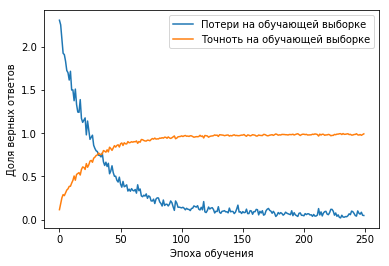

In [0]:
plt.plot(history.history['loss'], 
           label='Потери на обучающей выборке')
plt.plot(history.history['acc'], 
           label='Точноть на обучающей выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
model.load_weights('dz_aud_16.h5')

## Результат

In [0]:
result = model.evaluate(X_test,y_test)

print(result)

100/100 [==============================] - 0s 2ms/sample - loss: 2.0131 - acc: 0.7700
[2.013060557246208, 0.77]


# Ансамль из нейросети и классическом обучении

In [0]:
pred_neir = model.predict(X_test)
pred_neiroset=np.argmax(pred_neir, axis=1)
print(pred_neiroset)

[7 5 5 3 1 8 5 2 9 5 5 0 1 1 8 3 1 5 0 3 7 2 1 4 3 3 2 3 7 7 6 7 3 7 3 9 4
 0 3 7 4 1 4 1 1 0 2 6 6 5 5 4 8 1 6 2 1 2 9 3 0 3 5 0 7 2 2 1 7 8 1 7 6 7
 6 2 0 9 0 0 3 4 6 5 7 0 8 4 9 7 0 9 8 7 0 5 9 1 0 0]


In [0]:
ind = []
for i in range(len(y_test)):
    cot = []
    a = pred_a[i]
    b = pred_b[i]
    c = pred_c[i]
    d = pred_d[i]
    e = pred_e[i]
    g = pred_g[i]
    h = pred_h[i]
    x = pred_neiroset[i]
    cot.append(a)
    cot.append(b)
    cot.append(c)
    cot.append(d)
    cot.append(e)
    cot.append(g)
    cot.append(h)
    cot.append(x)
    ind.append(cot)
print(ind)

[[7, 7, 7, 7, 7, 7, 7, 7], [5, 5, 5, 5, 5, 5, 5, 5], [3, 3, 9, 2, 3, 3, 3, 5], [8, 8, 4, 3, 4, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1], [8, 8, 8, 8, 8, 8, 8, 8], [1, 2, 2, 2, 2, 5, 8, 5], [2, 2, 2, 3, 3, 2, 3, 2], [3, 6, 3, 9, 3, 6, 9, 9], [5, 5, 8, 8, 8, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1], [5, 8, 5, 1, 1, 5, 1, 1], [8, 4, 8, 8, 8, 8, 8, 8], [3, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1], [5, 5, 5, 2, 5, 5, 5, 5], [0, 0, 2, 2, 0, 0, 0, 0], [3, 3, 3, 3, 3, 3, 3, 3], [4, 7, 7, 7, 7, 7, 7, 7], [2, 2, 1, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1], [4, 8, 4, 8, 4, 4, 8, 4], [3, 3, 5, 4, 3, 3, 8, 3], [3, 3, 3, 8, 3, 3, 3, 3], [2, 2, 2, 2, 0, 2, 0, 2], [6, 6, 3, 9, 9, 9, 9, 3], [7, 4, 7, 7, 7, 7, 4, 7], [7, 7, 5, 5, 7, 7, 7, 7], [4, 5, 9, 6, 0, 6, 4, 6], [7, 7, 7, 7, 7, 7, 7, 7], [6, 9, 3, 9, 3, 3, 9, 3], [7, 7, 7, 3, 7, 7, 3, 7], [3, 3, 3, 8, 3, 3, 8, 3], [2, 9, 9, 2, 3, 3, 9, 9], [4, 4, 0, 8, 8, 9, 3, 4], [9, 8, 0, 2, 0, 0, 9, 0], [3, 9, 3, 8

In [0]:
inList = []
for i in range(len(ind)):
    w = ind[i]
    n = 0
    for j in range(len(w)):
        n_buf = 0
        n_buf = w.count(w[j])
        if n_buf > n:
            n = n_buf
            indJ = j
    inList.append(w[indJ])
print(inList)

[7, 5, 3, 3, 1, 8, 2, 2, 3, 5, 5, 0, 1, 1, 8, 3, 1, 5, 0, 3, 7, 2, 1, 4, 3, 3, 2, 9, 7, 7, 6, 7, 3, 7, 3, 9, 4, 0, 3, 4, 8, 1, 6, 1, 1, 0, 2, 6, 6, 5, 2, 9, 8, 1, 6, 5, 1, 2, 9, 3, 0, 3, 5, 0, 7, 2, 2, 1, 7, 8, 1, 7, 6, 4, 6, 2, 0, 0, 0, 0, 3, 4, 6, 5, 7, 0, 5, 6, 2, 7, 0, 9, 8, 7, 5, 5, 9, 1, 0, 0]


In [0]:
n=0
for i in range(len(y_test)):
    if inList[i] == y_test[i]:
        n=n+1
res = n/y_test.shape[0]
print(res)

0.71
